NAME-ROHAN JAISWAL
ROLL-MA22M026

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string


In [2]:
import json

In [3]:
with open('News_Category_Dataset_v3.json','r') as f:
    jdata = f.read()

jdata2  = [json.loads(line) for line in jdata.split('\n') if line]
df = pd.DataFrame.from_records(jdata2)

In [4]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


# PART -1 FAKE NEWS DETECTION

# Adding label for true news

In [5]:
df["class"] = 1

In [6]:
df

,link,headline,category,short_description,authors,date,class
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,1
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,1
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,1
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,1
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,1
...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,1
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,1
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,1
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,1


# See categories

In [7]:
top_7_categories = df['category'].value_counts().nlargest(7).index
print(top_7_categories)
data=df[['category','short_description','class']][df['category'].isin(top_7_categories)].reset_index(drop=True)
display(data['category'].value_counts())

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING'],
      dtype='object')


POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
Name: category, dtype: int64

In [8]:
data_true=data.iloc[0:30000]

In [9]:
data_true

,category,short_description,class
0,PARENTING,"""Accidentally put grown-up toothpaste on my to...",1
1,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",1
2,POLITICS,President issues vow as tensions with China rise.,1
3,POLITICS,An annual celebration took on a different feel...,1
4,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",1
...,...,...,...
29995,POLITICS,"""Every day that goes by, this just becomes mor...",1
29996,POLITICS,"If the war on drugs is a failure, why are lawm...",1
29997,POLITICS,Fifteen years after the horrific terrorist att...,1
29998,TRAVEL,9. EYE SEE YOU The Baku Eye is Azerbaijan’s ve...,1


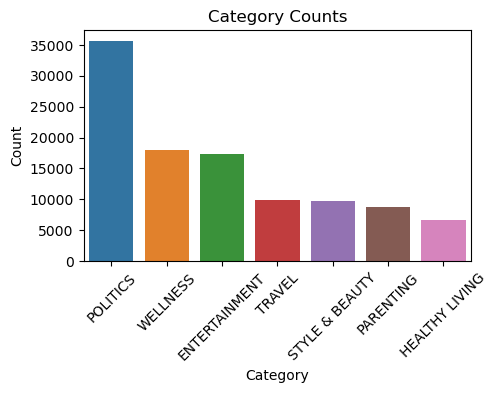

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = data['category'].value_counts()

# Create a bar plot (histogram) of the category counts using seaborn
plt.figure(figsize=(5, 3))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=45)
plt.show()

In [11]:
data_fake = pd.read_csv('Fake.csv')

In [12]:
data_fake["class"] = 0

In [13]:
data_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [14]:
data_fake = data_fake.drop(["title","date"],axis = 1)

In [15]:
data_fake['category'] = data_fake["subject"]

In [16]:
data_fake.head()

,text,subject,class,category
0,Donald Trump just couldn t wish all Americans ...,News,0,News
1,House Intelligence Committee Chairman Devin Nu...,News,0,News
2,"On Friday, it was revealed that former Milwauk...",News,0,News
3,"On Christmas day, Donald Trump announced that ...",News,0,News
4,Pope Francis used his annual Christmas Day mes...,News,0,News


In [17]:
data_fake['short_description'] = data_fake["text"]

In [18]:
data_fake = data_fake.drop(["text","subject"],axis = 1)

In [19]:
data_fake.head()

,class,category,short_description
0,0,News,Donald Trump just couldn t wish all Americans ...
1,0,News,House Intelligence Committee Chairman Devin Nu...
2,0,News,"On Friday, it was revealed that former Milwauk..."
3,0,News,"On Christmas day, Donald Trump announced that ..."
4,0,News,Pope Francis used his annual Christmas Day mes...


# Merging data

In [20]:
data_merge = pd.concat([data_fake,data],axis = 0)

In [21]:
data_merge

,class,category,short_description
0,0,News,Donald Trump just couldn t wish all Americans ...
1,0,News,House Intelligence Committee Chairman Devin Nu...
2,0,News,"On Friday, it was revealed that former Milwauk..."
3,0,News,"On Christmas day, Donald Trump announced that ..."
4,0,News,Pope Francis used his annual Christmas Day mes...
...,...,...,...
106103,1,WELLNESS,"My great-aunt Ida loves to say, ""This is only ..."
106104,1,STYLE & BEAUTY,"""A Look Back"" is a daily column that highlight..."
106105,1,PARENTING,Do you feel kids today are as responsible as k...
106106,1,ENTERTAINMENT,Representation of the collective diaspora has ...


In [22]:
new_data = data_merge.sample(frac = 1)

# new_data is for fake news detection

In [23]:
new_data.head(10) 

,class,category,short_description
3769,0,News,You know how the NRA constantly tells us that ...
1070,0,News,Donald Trump apparently expects Democrats to s...
88201,1,TRAVEL,Seville is many things -- it is the city of Ca...
13502,1,POLITICS,The House minority leader reportedly told the ...
64420,1,ENTERTAINMENT,MK: What level are you at? My parents are in t...
4642,0,News,"Sunday night, an ABC News affiliate in New Yor..."
17655,0,left-news,Even though the media and the their allies in ...
6657,1,POLITICS,The president’s political advisers believe som...
96133,1,WELLNESS,Those near and dear to us will feel our absenc...
19080,1,POLITICS,Neither option serves the interests of the maj...


In [24]:
display(new_data['category'].value_counts())

POLITICS           35602
WELLNESS           17945
ENTERTAINMENT      17362
TRAVEL              9900
STYLE & BEAUTY      9814
News                9050
PARENTING           8791
politics            6841
HEALTHY LIVING      6694
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: category, dtype: int64

Function

In [25]:
def wordopt(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub("\\W"," ", text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  return text

In [26]:
new_data["short_description"] = new_data["short_description"].apply(wordopt)

In [27]:
x = new_data['short_description']
y = new_data["class"]

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

# Text to vector

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [31]:
pred_lr = LR.predict(xv_test)

In [32]:
LR.score(xv_test,y_test)

0.9835175010803135

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [34]:
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [35]:
pred_DT = DT.predict(xv_test)

In [36]:
DT.score(xv_test,y_test)

0.9826532502006297

In [37]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5877
           1       0.99      0.99      0.99     26521

    accuracy                           0.98     32398
   macro avg       0.98      0.96      0.97     32398
weighted avg       0.98      0.98      0.98     32398



# Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()

GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [39]:
pred_GB = GB.predict(xv_test)

In [40]:
GB.score(xv_test,y_test)

0.9834249027717761

In [41]:
print(classification_report(y_test,pred_GB))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5877
           1       0.98      1.00      0.99     26521

    accuracy                           0.98     32398
   macro avg       0.99      0.96      0.97     32398
weighted avg       0.98      0.98      0.98     32398



# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(xv_train,y_train)

RandomForestClassifier()

In [44]:
pred_RF = RF.predict(xv_test)

In [45]:
RF.score(xv_test,y_test)

0.983857028211618

In [46]:
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      5877
           1       0.98      1.00      0.99     26521

    accuracy                           0.98     32398
   macro avg       0.99      0.96      0.97     32398
weighted avg       0.98      0.98      0.98     32398



# Manually testing news is fake or not

In [47]:
def output_label(n):
    if n == 0:
        return "Fake News"
    else:
        return "Not a fake News"


def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test =  vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR prediction:{} \nDT prediction:{} \n RF prediction :{} \nGB prediction: {}".format(output_label(pred_LR[0]),
                                                                                                         output_label(pred_DT[0]),
                                                                                                         output_label(pred_RF[0]),
                                                                                                         output_label(pred_GB[0])))


In [48]:
news = str(input())
manual_testing(news)

On August 9, the Rajya Sabha approved the DPDP bill that introduces several compliance requirements for the collection and processing of personal data, has provisions to curb misuse of individuals' data by online platforms, and entails up to Rs 250 crore penalty for any data breach. Data of children can be processed after consent from guardians, as per the DPDP law. The Lok Sabha had approved the bill on August 7. The government expects to implement the Act within 10 months, IT Minister Vaishnaw had said earlier this week


LR prediction:Not a fake News 
DT prediction:Not a fake News 
 RF prediction :Not a fake News 
GB prediction: Not a fake News


# PART - 2

# Categoriges true news

In [49]:
data_cate = df[['category','short_description']][df['category'].isin(top_7_categories)].reset_index(drop=True)
display(data['category'].value_counts())

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
Name: category, dtype: int64

In [50]:
data_cate

,category,short_description
0,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
1,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv..."
2,POLITICS,President issues vow as tensions with China rise.
3,POLITICS,An annual celebration took on a different feel...
4,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009..."
...,...,...
106103,WELLNESS,"My great-aunt Ida loves to say, ""This is only ..."
106104,STYLE & BEAUTY,"""A Look Back"" is a daily column that highlight..."
106105,PARENTING,Do you feel kids today are as responsible as k...
106106,ENTERTAINMENT,Representation of the collective diaspora has ...


In [51]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_cate, test_size=0.2, random_state=42)

In [52]:
## clean_text
import nltk
from nltk.stem import WordNetLemmatizer
import spacy

import string
from nltk.corpus import stopwords

In [53]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PCLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [56]:
train['clean_text'] = train['short_description'].apply(clean_text)
test['clean_text'] = test['short_description'].apply(clean_text)

In [57]:
## remove_stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

In [58]:
def remove_stopwords(text):
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

In [59]:
train['clean_text'] = train['clean_text'].apply(remove_stopwords)
test['clean_text'] = test['clean_text'].apply(remove_stopwords)

In [60]:
##  stemm_text

import nltk

stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [61]:
train['clean_text'] = train['clean_text'].apply(stemm_text)
test['clean_text'] = test['clean_text'].apply(stemm_text)

In [62]:
## preprocess_data

def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
#     text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))

    return text

In [63]:
train['clean_text'] = train['clean_text'].apply(preprocess_data)
test['clean_text'] = test['clean_text'].apply(preprocess_data)

In [64]:
train

,category,short_description,clean_text
91817,WELLNESS,Have a health goal in mind? Sometimes it can s...,health goal mind sometim seem like youll never...
31436,ENTERTAINMENT,"Meanwhile, you continued to star in zero movies.",meanwhil continu star zero movi
101331,WELLNESS,"If change is vibration, a shift in chords crea...",chang vibrat shift chord creat anoth song enti...
88598,WELLNESS,By Ransdell Pierson Patients taking bedaquilin...,ransdel pierson patient take bedaquilin also i...
70360,STYLE & BEAUTY,"Timberland Women's 6"" Premium Boot, $134; Hat ...",timberland women premium boot hat attack ove...
...,...,...,...
54886,POLITICS,Who do you think Doane Robinson would have cho...,think doan robinson would chosen mount rushmor...
76820,STYLE & BEAUTY,"Come on now, don’t be a flip-flopper. Because ...",come dont flipflopp come summer footwear comm...
103694,STYLE & BEAUTY,"Article by: Clarissa Burt, Brooke Smith and Em...",articl clarissa burt brook smith emili beth iv...
860,POLITICS,"""The Daily Show"" host used the rumored celebri...",daili show host use rumor celebr romanc make p...


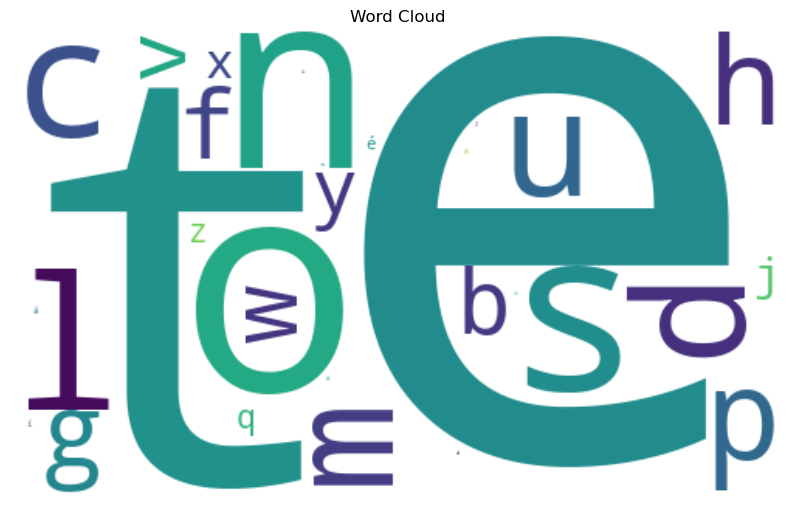

In [65]:
#convert words into tokens then send to wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3, contour_color='steelblue',
                          width=500, height=300, scale=1, max_font_size=500, collocations=False)
    wordcloud.generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)  # Set the title
    plt.axis("off")
    plt.show()

# Function to create word cloud from filtered_df
def word_cloud(filtered_df):
    joined_tokens = filtered_df['clean_text'].apply(lambda tokens: ' '.join(tokens))
    combined_text_with_emoji = ' '.join(joined_tokens.tolist())
    return combined_text_with_emoji

combined_tokens = word_cloud(train)

    # Generate and display word clouds with headings
generate_word_cloud(combined_tokens, "Word Cloud")

In [66]:
train['clean_text'] 

91817     health goal mind sometim seem like youll never...
31436                       meanwhil continu star zero movi
101331    chang vibrat shift chord creat anoth song enti...
88598     ransdel pierson patient take bedaquilin also i...
70360     timberland women  premium boot  hat attack ove...
                                ...                        
54886     think doan robinson would chosen mount rushmor...
76820     come dont flipflopp come summer footwear  comm...
103694    articl clarissa burt brook smith emili beth iv...
860       daili show host use rumor celebr romanc make p...
15795     jame dorsey us presid donald j trump step coul...
Name: clean_text, Length: 84886, dtype: object

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
#fit_transform for train data
X_train_tf = vectorizer.fit_transform(train['clean_text'])
y_train_tf = train['category']
#transform for test data
X_test_tf = vectorizer.transform(test['clean_text'])
y_test_tf = test['category']

In [68]:
X_train_tf

<84886x39249 sparse matrix of type '<class 'numpy.float64'>'
	with 922438 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# TF-IDF

In [70]:
X_train_tf, X_val_tf, y_train_tf, y_val_tf = train_test_split(X_train_tf, y_train_tf, test_size = 0.2, random_state = 42)

In [71]:
model_log = LogisticRegression(random_state = 42)
model_log.fit(X_train_tf, y_train_tf)

C:\Users\PCLAB\anaconda3\envs\gpyopt\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [72]:
y_pred = model_log.predict(X_val_tf)
acc = accuracy_score(y_val_tf, y_pred)
print(f'acc:{acc}')

acc:0.6985510660855224


In [73]:
#Predictions on test set
test_pred = model_log.predict(X_test_tf)
test_true= y_test_tf

In [74]:
print(classification_report(test_true,test_pred,target_names=data_cate['category'].unique(),digits=4))

                precision    recall  f1-score   support

     PARENTING     0.6433    0.5572    0.5972      3512
 ENTERTAINMENT     0.4084    0.0592    0.1034      1318
      POLITICS     0.7368    0.5777    0.6477      1769
      WELLNESS     0.7186    0.8975    0.7981      7216
STYLE & BEAUTY     0.7981    0.6793    0.7339      1949
        TRAVEL     0.7976    0.6694    0.7279      1966
HEALTHY LIVING     0.6520    0.7993    0.7181      3492

      accuracy                         0.7051     21222
     macro avg     0.6792    0.6056    0.6180     21222
  weighted avg     0.6920    0.7051    0.6836     21222



In [75]:
# Generate the classification report
report = classification_report(test_true, test_pred, target_names=data_cate['category'].unique(), digits=4, output_dict=True)

from sklearn.metrics import confusion_matrix

# Assuming you already have the 'test_true' and 'test_pred' variables.

# Generate the confusion matrix
cm = confusion_matrix(test_true, test_pred)

print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[1957   22   60 1160  103   85  125]
 [  98   78   51  491   18   24  558]
 [ 133   10 1022  160   51   39  354]
 [ 350   24   66 6476   42   70  188]
 [ 253    7   48  151 1324   39  127]
 [ 140    5   23  290   54 1316  138]
 [ 111   45  117  284   67   77 2791]]


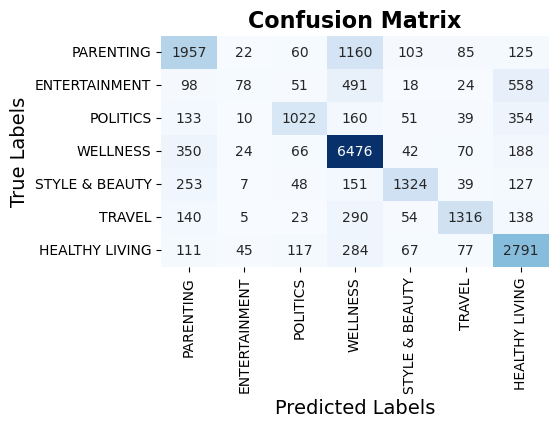

In [76]:
cm_df = pd.DataFrame(cm, index=data_cate['category'].unique(), columns=data_cate['category'].unique())

# Create the heatmap using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

# bag of words

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer object
vectorizer = CountVectorizer()

# fit_transform for train data
X_train_bow = vectorizer.fit_transform(train['clean_text'])
y_train_bow = train['category']

# transform for test data
X_test_bow = vectorizer.transform(test['clean_text'])
y_test_bow = test['category']

In [78]:
X_train_bow, X_val_bow, y_train_bow, y_val_bow = train_test_split(X_train_bow, y_train_bow, test_size = 0.2, random_state = 42)

In [79]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train_bow, y_train_bow)

SVC(kernel='linear', random_state=42)

In [80]:
y_pred = model.predict(X_val_bow)
acc = accuracy_score(y_val_bow, y_pred)
print(f'acc:{acc}')

acc:0.6639180115443515


In [81]:
#Predictions on test set
test_pred = model.predict(X_test_bow)
test_true= y_test_bow

In [82]:
print(classification_report(test_true,test_pred,target_names=data_cate['category'].unique(),digits=4))

                precision    recall  f1-score   support

     PARENTING     0.5797    0.5404    0.5594      3512
 ENTERTAINMENT     0.2139    0.1495    0.1760      1318
      POLITICS     0.6166    0.6128    0.6147      1769
      WELLNESS     0.7180    0.8650    0.7847      7216
STYLE & BEAUTY     0.7516    0.6675    0.7071      1949
        TRAVEL     0.7595    0.5992    0.6699      1966
HEALTHY LIVING     0.6770    0.6386    0.6572      3492

      accuracy                         0.6658     21222
     macro avg     0.6166    0.5819    0.5956     21222
  weighted avg     0.6556    0.6658    0.6567     21222



In [83]:
# Generate the classification report
report = classification_report(test_true, test_pred, target_names=data_cate['category'].unique(), digits=4, output_dict=True)

from sklearn.metrics import confusion_matrix

# Assuming you already have the 'test_true' and 'test_pred' variables.

# Generate the confusion matrix
cm = confusion_matrix(test_true, test_pred)

print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[1898   40  101 1216  107   81   69]
 [ 127  197   63  503   20   24  384]
 [ 145   75 1084  110   57   46  252]
 [ 513  103   87 6242   47   81  143]
 [ 255   44   85  137 1301   42   85]
 [ 184   54   81  241   97 1178  131]
 [ 152  408  257  244  102   99 2230]]


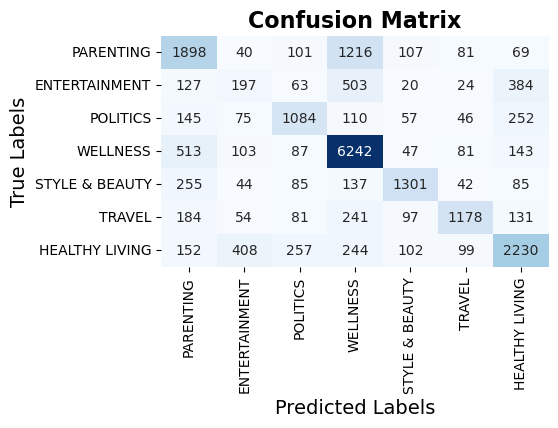

In [84]:
cm_df = pd.DataFrame(cm, index=data_cate['category'].unique(), columns=data_cate['category'].unique())

# Create the heatmap using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

# Manually Testing category of news

In [85]:
def cate_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_def_test["text"] = new_def_test["text"].apply(remove_stopwords)
    new_def_test["text"] = new_def_test["text"].apply(stemm_text)
    
    new_def_test["text"] = new_def_test["text"].apply(preprocess_data)
    
    
    
    
    new_x_test = new_def_test["text"]
    new_xv_test =  vectorizer.transform(new_x_test)
    pred_LR = model_log.predict(new_xv_test)

    return print("The category of this news is:{}".format(pred_LR))

In [86]:
news = str(input())
cate_testing(news)

On August 9, the Rajya Sabha approved the DPDP bill that introduces several compliance requirements for the collection and processing of personal data, has provisions to curb misuse of individuals' data by online platforms, and entails up to Rs 250 crore penalty for any data breach. Data of children can be processed after consent from guardians, as per the DPDP law. The Lok Sabha had approved the bill on August 7. The government expects to implement the Act within 10 months, IT Minister Vaishnaw had said earlier this week
The category of this news is:['POLITICS']


# PART-3 Sentiment Analysis

In [87]:
import requests
import json
import numpy as np
import pandas as pd
import nltk
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake

In [88]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = []
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington']
    stop_words.extend(specific_words_list )
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
# function for lemmatization
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [89]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x):
    return tokenizer.tokenize(x)

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PCLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
df

,link,headline,category,short_description,authors,date,class
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,1
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,1
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,1
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,1
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,1
...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,1
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,1
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,1
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28,1


In [94]:
df=df.drop(["link","category","authors","date"],axis = 1) #again take df thats what not adding class

In [95]:
# combine the headline and the short_description	 to get one dataframe column
df['combined_text'] = df['headline'].map(str) +" "+ df['short_description'].map(str)

In [96]:
df

,headline,short_description,class,combined_text
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,1,Over 4 Million Americans Roll Up Sleeves For O...
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,1,"American Airlines Flyer Charged, Banned For Li..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",1,23 Of The Funniest Tweets About Cats And Dogs ...
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",1,The Funniest Tweets From Parents This Week (Se...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,1,Woman Who Called Cops On Black Bird-Watcher Lo...
...,...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...,1,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr...",1,Maria Sharapova Stunned By Victoria Azarenka I...
209524,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked...",1,"Giants Over Patriots, Jets Over Colts Among M..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...,1,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [97]:
# applying all of these functions to the our dataframe
df['combined_text'] = df['combined_text'].map(clean_text)
df['tokens'] = df['combined_text'].map(tokenize)
df['tokens'] = df['tokens'].map(remove_stopwords)
df['lems'] = df['tokens'].map(lemmatize)

In [98]:
df.head()

,headline,short_description,class,combined_text,tokens,lems
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,1,over million americans roll up sleeves for om...,"[million, americans, roll, sleeves, omicron, t...",million american roll sleeve omicron targeted ...
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,1,american airlines flyer charged banned for lif...,"[american, airlines, flyer, charged, banned, l...",american airline flyer charged banned life pun...
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",1,of the funniest tweets about cats and dogs thi...,"[funniest, tweets, cats, dogs, week, sept, dog...",funniest tweet cat dog week sept dog understan...
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",1,the funniest tweets from parents this week sep...,"[funniest, tweets, parents, week, sept, accide...",funniest tweet parent week sept accidentally p...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,1,woman who called cops on black bird watcher lo...,"[woman, called, cops, black, bird, watcher, lo...",woman called cop black bird watcher loses laws...


In [99]:
# sentiment analysis

In [100]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PCLAB\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [101]:
# calculating the polarity of the news articles
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [102]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news
headlines_polarity = pd.DataFrame.from_records(results)

In [103]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0

# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1

# if the compound score is below 0.2 then it is considered negative
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1

# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [104]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,label,word_count
0,0.064,0.936,0.000,-0.1280,million american roll sleeve omicron targeted ...,0,23
1,0.272,0.728,0.000,-0.7269,american airline flyer charged banned life pun...,-1,22
2,0.000,0.714,0.286,0.5574,funniest tweet cat dog week sept dog understan...,1,10
3,0.175,0.597,0.228,0.3400,funniest tweet parent week sept accidentally p...,1,20
4,0.368,0.632,0.000,-0.8957,woman called cop black bird watcher loses laws...,-1,27


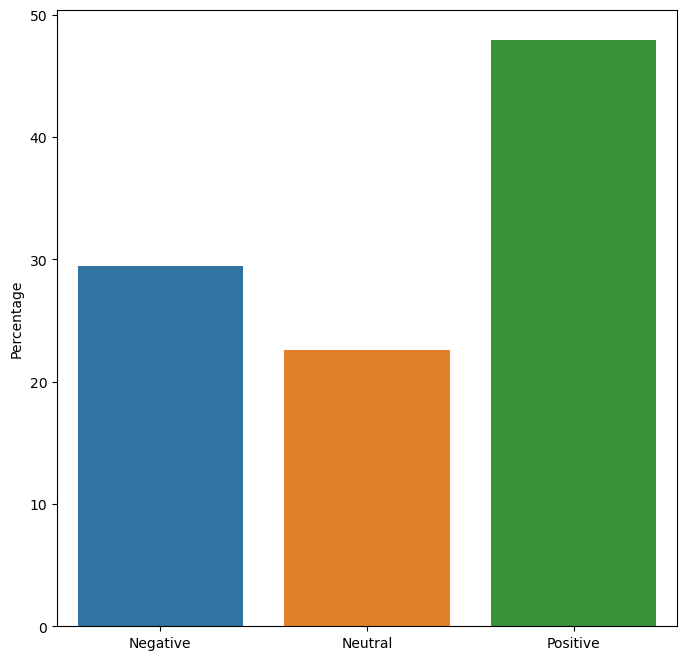

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

In [106]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
print(type(stop_words))
specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington']
#stop_words.extend(specific_words_list )
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    return tokens

<class 'list'>


In [107]:
# Positive headlines and its distribution
pos_lines = list(headlines_polarity[headlines_polarity.label == 1].headline)
# extract the headlines that had label =1 which meant it had a positive overall sentiment
pos_tokens =process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

# Now negative headlines
neg_lines = list(headlines_polarity[headlines_polarity.label == -1].headline)
# extract the headlines that had label-1 which meant it had a negative overall sentiment
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

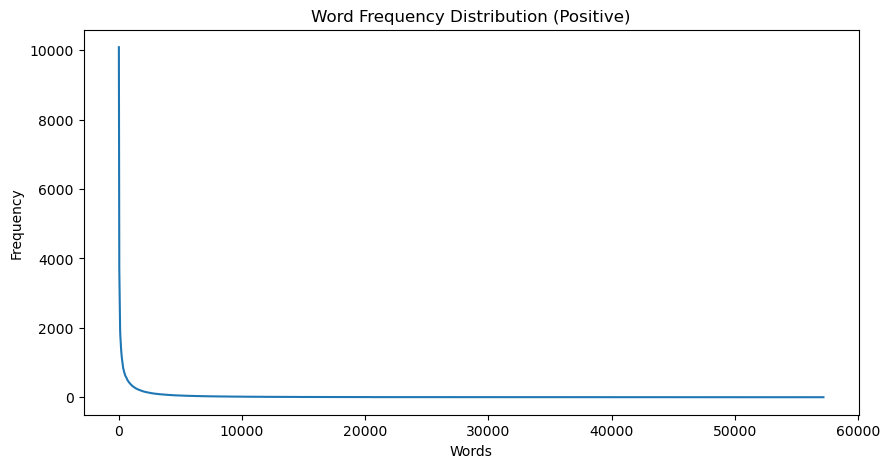

In [108]:
# plotting the word distribution for positive headlines
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

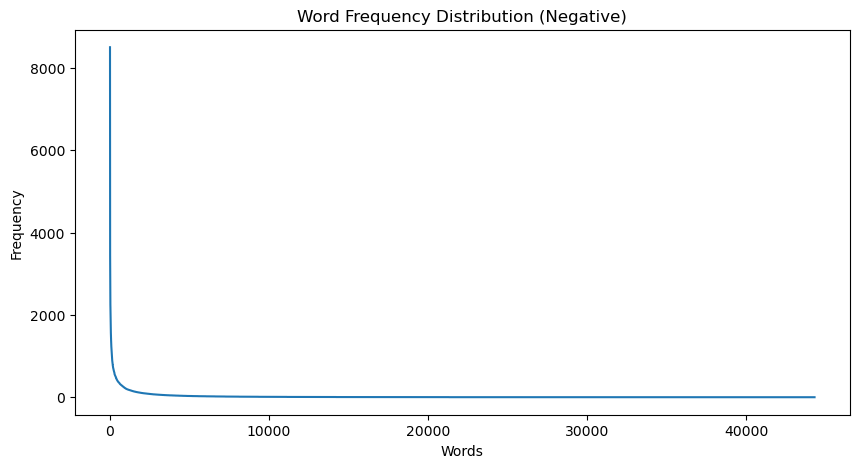

In [109]:
# Plotting the word frequency distribution for negative headlines
y_val = [x[1] for x in neg_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

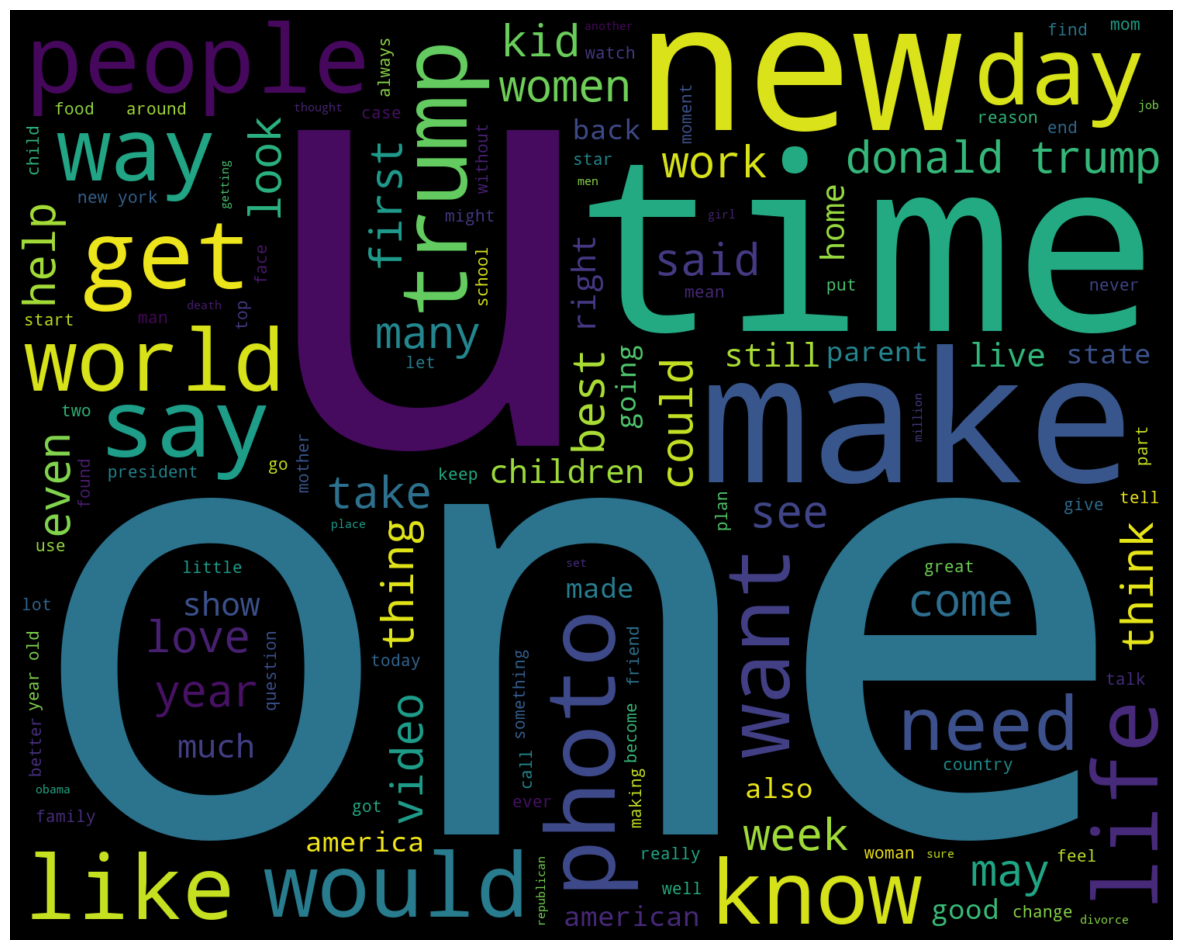

In [110]:
data=df
stop = ["https", "co", "char","chars"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['combined_text']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [111]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()

#fit_transform for train data
X = vectorizer.fit_transform(headlines_polarity['headline'])
Y = headlines_polarity['label']


# Model 

# Logistic Regression

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [113]:
log_reg = LogisticRegression(random_state = 42)

log_reg.fit(X_train, y_train)

C:\Users\PCLAB\anaconda3\envs\gpyopt\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [114]:
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'acc:{acc}')

acc:0.8494010404238057


# SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'accuracy:{acc}')

# Manually Sentiment checking

In [115]:
def sen_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].map(clean_text)
    new_def_test["text"] = new_def_test["text"].map(tokenize)
    new_def_test["text"] = new_def_test["text"].map(remove_stopwords)
    
    new_def_test["text"] = new_def_test["text"].map(lemmatize)
    
    
    
    
    new_x_test = new_def_test["text"]
    new_xv_test =  vectorizer.transform(new_x_test)
    pred_LR = log_reg.predict(new_xv_test)
    D = {1:"Positive",0:"Neutral",-1:"Negative"}
    return print("The sentiment of this news is:{}".format(D[int(pred_LR)]))

In [116]:
news = str(input())
sen_testing(news)

On August 9, the Rajya Sabha approved the DPDP bill that introduces several compliance requirements for the collection and processing of personal data, has provisions to curb misuse of individuals' data by online platforms, and entails up to Rs 250 crore penalty for any data breach. Data of children can be processed after consent from guardians, as per the DPDP law. The Lok Sabha had approved the bill on August 7. The government expects to implement the Act within 10 months, IT Minister Vaishnaw had said earlier this week
The sentiment of this news is:Positive


# For a given news all in one

In [117]:
def senti(news):
   
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].map(clean_text)
    new_def_test["text"] = new_def_test["text"].map(tokenize)
    new_def_test["text"] = new_def_test["text"].map(remove_stopwords)
    
    new_def_test["text"] = new_def_test["text"].map(lemmatize)
    new_x_test = new_def_test["text"]
    new_xv_test =  vectorizer.transform(new_x_test)
    pred_LR = log_reg.predict(new_xv_test)
    return int(pred_LR)

In [118]:
def category(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_def_test["text"] = new_def_test["text"].apply(remove_stopwords)
    new_def_test["text"] = new_def_test["text"].apply(stemm_text)
    
    new_def_test["text"] = new_def_test["text"].apply(preprocess_data)
    
    
    
    
    new_x_test = new_def_test["text"]
    new_xv_test =  vectorizer.transform(new_x_test)
    pred_LR = model_log.predict(new_xv_test)
    return pred_LR

In [119]:
def News_given(news):
    D = {1:"Positive",0:"Neutral",-1:"Negative"}
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test =  vectorization.transform(new_x_test)
    pred_RF = RF.predict(new_xv_test)
    print("The given news is:{}".format(output_label(pred_RF[0])))
    if pred_RF[0] != 0:
        print("The news is not fake and category of the news is:",category(news),"The sentiment of the news is:",D[senti(news)])
    if pred_RF[0] == 0:
        print("The news is fake and category of the news is:",category(news),"The sentiment of the news is:",D[senti(news)])

In [ ]:
news = str(input())
News_given(news)